In [2]:
import csv
import numpy as np
import os
import pandas as pd
import sqlite3 as sql
%matplotlib inline

# Families and the titanic
## Questions to investigate:

    How did family size effect the survival rate? 
    How did women and orphans fare?
    Were upper class families more likely to survive?
    

## Loading the Data

In [11]:
cwd = os.getcwd()
data_set = os.path.join(cwd,"titanic.db")
conn = sql.connect(data_set)
df = pd.read_sql("select * from titanic;", conn)
df.info()

/Users/jklein/data_analyst/P2-Investigate-a-Dataset/titanic.db
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
index          891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


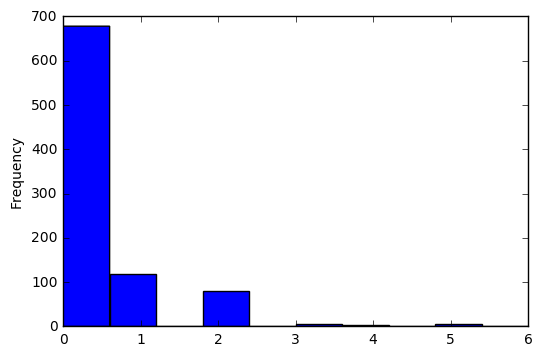

In [31]:
#Create Family size feature
df['family_size']= df['SibSp'] + df['Parch']
%matplotlib inline
# df['family_size'].plot(kind = "hist")
# df['SibSp'].plot(kind = "hist")
df['Parch'].plot(kind = "hist")



In [13]:
pd.read_sql("""
    select 
        SibSp
        ,sum(survived) as Survived
        ,count(survived) as Total
    from titanic
    group by SibSp;
""", conn)

,SibSp,Survived,Total
0,0,210,608
1,1,112,209
2,2,13,28
3,3,4,16
4,4,3,18
5,5,0,5
6,8,0,7


In [16]:
pd.read_sql("""
    select 
        Parch
        ,sum(survived) as Survived
        ,count(survived) as Total
        ,Age
    from titanic
    group by Parch, Age;
""", conn)

,Parch,Survived,Total,Age
0,0,47,157,NaN
1,0,1,1,5.0
2,0,0,1,11.0
3,0,1,1,12.0
4,0,1,1,13.0
5,0,2,3,14.0
6,0,0,1,14.5
7,0,3,3,15.0
8,0,4,11,16.0
9,0,4,10,17.0


## Create Gender Feature

In [6]:
sex_dummies = pd.get_dummies(df['Sex'])
pd.concat([df,sex_dummies], axis=1)
sex_dummies


,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0
